# <span id="chap_concepts_processes"></span> Processes on networks

When scientists speak of a **process**, we usually mean "a system whose state varies with time". The realisation of any process is therefore a **time series**, the elements of which are the overall state of the system being studied. For a simple process like a swinging pendulum the state may be very simple, consisting purely of the angle the pendulum makes with the vertical axis: as the pendulum swings this angle changes. We need to know the starting state of the system &ndash; its **initial conditions**, the state of the system at $t = 0$ &ndash; and from then on the process "runs" (or "evolves") according to some description (Newtonian dynamics in this case). It's important to realise that everything we need to know about the system is ceptured by the rules describing the process and the initial conditions, and these give rise to the time series of states as the process evolves.

The time series resulting from a process may have various properties. It may be **deterministic**, in the sense that the values in the time series of a given process are uniquely and unambiguously specified by the initial conditions (this is the case for a pendulum); alternatively it may be **stochastic**, having an element of randomness that means that the *same* set of initial conditions could give rise to *different* realisations. A process may **stabilise**, when it **converges** to a fixed state after some time; or it may **oscillate** between two or more states, or **orbit** a given state, or behave **chaotically** and never stabilise or repeat itself.

Most familiar processes (like pendulums) operate in normal two- or three-dimensional space. But we can also consider networks as a "substrate" over which we run processes. To do this we need to decide what it means to be the state of a network process, and how we are going to describe its evolution.

### <span id="sec_concepts_processes_overview"></span> An overview of processes on networks

Suppose we have a network with its nodes and edges. A process on (or over) this network is a model that associates with each node (and sometimes with each edge) some state, one or more propertes that can vary with time. At a global level, we can look at the network at some instant and see the state associated with all of its elements. As time progresses, the states of some or all of the nodes may change, forming the time series of this specific realisation of the process. Describing the process involves deciding when and how to update the values at the different nodes, starting from the initial conditions at $t = 0$.

This is the **global view** of a process, expressed in terms of the entire network. When we run such a process we are typically looking for some phenomenon being globally present (or absent), expressed in terms of the entire population of nodes. This global view can be contrasted against the **local view** of a process, which focuses on the state of an individual node, the nodes in its immediate neighbourhood, and the way in which each node's state is updated.

As a general rule, we are mainly interested in the properties of the global process that emerge from the interactions between nodes whose states are defined in purely local terms. 

The critical insight of network science is this: local state changes can give rise to predictable global phenomena, and these global phenomena can change suddenly. These changes are often referred to as **phase transitions**, a term derived from physics. A phase transition happens when the global state of the network &ndash; the "dominant state" of the nodes &ndash; changes rapidly from one form to another. One might think that such changes would happen slowly, but this turns out often not to be the case.

A good example is the process of [epidemic spreading](epidemic-network.ipynb), where the nodes represent people, edges represent contacts between them, and a node's state records whether that person is susceptible to infection, infected, recovered, or is in some other situation depending on thge complexity of the model underlying the process. The local view controls how a person's state changes depending on the states of the people with whom she is in contact, perhaps with a susceptible person becoming infected with some probability. The global view looks at whether the individuals in the network have "all" or "mostly" been infected, referred to as an epidemic. It turns out that, for some diseases and some networks, there is a sudden transition from a largely uininfected phase to a largely infected phase: a epidemic threshold that causes the infection to break-out into a large fraction of the population in a very short space of time.

## <span is="sec_concepts_processes_specifying"></span> Specifying a process

To define a process on a network, we therefore need to consider two things:

1. the state associated with each node (and/or edge occasionally); and
1. the way in which the state of each node is updated as time progresses.

The state of a node is sometimes just a single value, and sometimes a collection of values (in which case we refer to a **state vector**). In a common model of epidemic spreading, the [SIR model](epidemic-compartmented.ipynb), the state is a single value denoting the infection status of an individual.

The way in which state is updated is captured by a set of one or more **local rules**, which might be expressed mathematically or (more frequently) as code. These rules are local in that they are expressed purely in terms of a node's state and the states of its immediate neighbours: those nodes conected to it by edges. The rule is a function from the state vector of the node, and the state vectrors of its neighbours, to a new state vector for the node. (Sometimes we encounter variations on this theme, for example where updating a node updates its neighbours as well. Those cases are quite specialised and rare, though, and by and large we will consider only local updates.) It's important to note that the local update rules make no reference to the global state of the network: they have no access to any global view, only to their own local "patch" of the network.

Typically the same local rule is used to update all nodes. This isn't necessarily the case, but it's overwhelmingly common.

### <span id="sec_concepts_processes_rules"></span> Defining local rules

The local rule may be a straightforward function between collections of state vectors, whicvh would give rise to a deterministic process dependent only on the initial conditions. Alternatively &ndash; and this is by far the most common situation &ndash; the process may be stochastic, including some random variable. Continuing with epidemic spreading as an example, the local rule might say that a node has a given probability of being infected by contact with each infected neighbour.

### <span id="sec_concepts_processes_stochasticity_implications"></span>The implications of stochasticity

Stochasticity has some important consequences.

Firstly, it means that the *same* process run again over the *same* network may produce *different* results: possibly *radically* different. This has important consequences for reproducibility, and we'll return to this topic several times.

Secondly, the fact that local rules involve the states of a neighbourhood of nodes means that the topology of the network may affect the ways in which the process can evolve. Processes may (for example) converge to one value on some classes of network while never stabilising on others.

Thirdly &ndash; and most importantly &ndash; the combination of a stochastic process with a random network means that  repeated runs of the same process on the same (or statistically similar) networks will be different. The results will exhibit a distribution: a stochastic process, driven by random variables with particular distributions, gives rise to a stochastic result with its own distribution. It might be the case that a given process on a particular class of network almost always converges to a particular state &ndash; but sometimes doesn't, due to some particular set of chance circumstances.

It is therefore never enough to run only one realisation of a process over only one network (of a given class). We always need to run multiple realisations and extract some sort of statistical summary from the results. Typically this might involve defining some value for each realisation (how many people became infected?) and then extracting the mean and variance of this value from a set of realisations. We might use exactly the same network with exactly the same initial conditions; or we might use the same network with random (but statistically similar) initial conditions; or we might use different (randomly-generated) networks with different (randomly-generated) initial conditions. We'll dig into these variations as we go along. 

### <span id="sec_concepts_processes_time"></span> Discrete or constant time

Networks are discrete structures, in the sense of being built out of a finite (although possibly very large) number of nodes and edges. Processes, however, can be seen in two distinct ways.

Perhaps the most obvious way for a computer scientist to think about a process on a network is is **discrete time**. We divide time into timesteps and, at each step, we advance the process by (for example) checking each susceptible node to see whether it becomes infected. This is a **synchronous** approach to simulation that's [simple to code](epidemic-synchronous,ipynb) but has some significant disadvantages that we'll explore later.

An alternative view &ndash; and one that's perhaps a more obvious way for a mathematician, physicist, or biologist to think about the situation &ndash; is to work in **contiunuous time** and ask when the next event of whatever type is likely to happen, given the probabilities involved. Since we typically know the distributions of the random variables, we can work this out and use it to "jump over" periods when nothing changes in the simulation, leading to an **asynchronous** siimulation. We [explore this approach later](epidemic-gillespie.ipynb) too.

## <span id="sec_concepts_processes_synchronisation"></span> An example: synchronisation

Let's do an example of a simple process running over a sinple network. In fact we'll use the simplest network we can imagine, the [square lattice we looked at earlier](concepts-networks#sec_concepts_networks_lattice). As a process, we'll use a very basic example of synchronisation whereby all the nodes in the network agree on an average value using only local information.

In [1]:
import cncp

import networkx
import numpy

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn

/Users/sd/research/writing/complex-networks-complex-processes/notebook/cncp/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We noted [above](#sec_concepts_processes_specifying) that we need to decide on the state of each node and the local rule used to update the nodes. We also need to decide between discrete and continuous time: for the sake of simplicity we'll choose discrete time without further discussion.

### <span id="sec_concepts_processes_synchronisatinn_initial"></span> Initial conditions and local rules

For the state of a node, we'll use a single real number. We'll create a lattice and initialise the nodes to a random number between 0 and 100, and we'll record the numbers so we can see whether the process we're describing really does converge to their mean: 

In [2]:
VALUE = 'value'

def init_network( g ):
    '''Initialise a network with random values on its nodes.
    
    :returns: a list of values assigned'''
    vs = []
    for n in g.nodes():
        v = numpy.random.random() * 100
        g.node[n][VALUE] = v
        vs.append(v)
    return vs
    
def init_lattice( rows, columns ):
    '''Create a lattice of the given dimensions and put random integers
    between 0 and 100 on the nodes.
    
    :param rows: number of rows in the lattice
    :param columns: number of columns in the lattice
    :returns: the network and its initial state vector'''
    
    # create network
    g = cncp.lattice_graph(rows, columns)
    vs = init_network(g)
    
    # return the network and the values attached to its nodes
    return (g, vs)

We can now define a process that, for each node in the network, grabs the values associated with it and its neighbours, averages them, and updates the node itself. We have to be slightly careful here to make sure that the updates use the values at time $t$ and don't take some values that have already been updated (to time $t + 1$), which would introduce an unwanted pattern: 

In [3]:
def update_values_step( g ):
    '''Update the values on the network.
    
    :param g: the network'''
    
    # perform the update, recording all the new values
    vs = dict()
    for n in g.nodes():
        # acquire the neighbourhood values
        v = 0
        ns = g.neighbors(n)
        for m in ns:
            v = v + g.node[m][VALUE]
            
        # compute the mean and store for later update
        v = v + g.node[n][VALUE]
        vprime = v / (len(ns) + 1)
        vs[n] = vprime
        
    # update the values on all the nodes
    for n in g.nodes():
        g.node[n][VALUE] = vs[n]

### <span id="sec_concepts_processes_synchronisation_run"></span> Running the process

Let's now define a way to visualise the current state of the lattice by colouring nodes according to their value. As the process runs, then &ndash; if we're right about what will happen &ndash; we should then see the colours converge to a single value:

In [4]:
def draw_lattice_values( g, axes = None ):
    '''Draw the lattice with the values encoded as colours.
    
    :param g: the lattice to draw
    :param axes: the axes in which to draw the network (defaults to the current figure)'''
    
    if axes is None:
        axes = plt.gca()
        
    # extract the values at the nodes
    cs = []
    for n in g.nodes():
        cs.append(g.node[n][VALUE])
        
    # draw the lattice (without edges) using the values as indices into the colour map
    cncp.draw_lattice(g,
                      axes = axes,
                      node_color = cs, vmin = 0, vmax = 100, cmap = cmap.hot,
                      node_size = 90, with_labels = False, edgelist = [])

Visualising the initial conditions for a network we get:

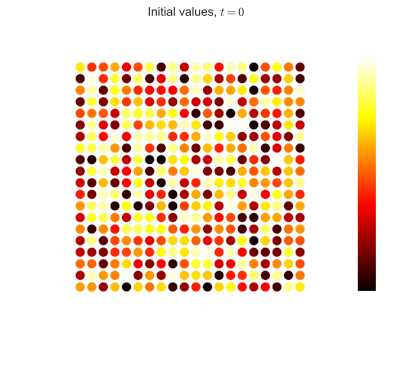

In [5]:
d = 20
(g, vs) = init_lattice(d, d)
t = 0

# set up the figure
fig = plt.figure(figsize = (5, 5))

# draw the network
axFig = fig.add_axes([ 0.0, 0.0, 0.9, 0.9 ])
axFig.set_axis_off()             # axes off
axFig.set_title("Initial values, $t = 0$")
draw_lattice_values(g)

# add a colour bar up the side
axColourbar = fig.add_axes([ 0.9, 0.15, 0.05, 0.65 ])
axColourbar.set_axis_off()
colourBar = mpl.colorbar.ColorbarBase(axColourbar, cmap = cmap.hot,
                                      norm = mpl.colors.Normalize(vmin = 0, vmax = 100),
                                      orientation = 'vertical')

_ = plt.show()

In this colourmap dark values are low and light values high. We expect the values to converge to the middle of the range $[0, 100]$, so to a middle shade. Running the convergence process means iterating for a number of steps: 

In [6]:
def update_values( g, T ):
    '''Update the values on a network for a number of timesteps.
    
    :param g: the network
    :param T: the number of timesteps'''
    for t in range(T):
        update_values_step(g)

Let's run the convergence process for 5 steps and see what happens:

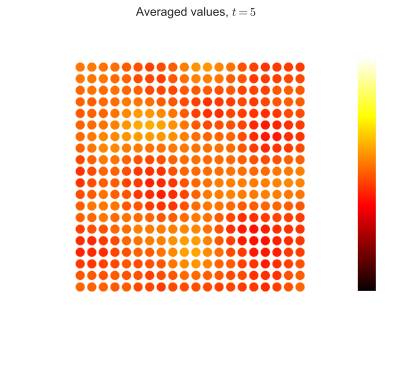

In [7]:
T = 5

# run the convergence process
update_values(g, T)
t = t + T

# re-draw the network with the converged values
fig = plt.figure(figsize = (5, 5))
axFig = fig.add_axes([ 0.0, 0.0, 0.9, 0.9 ])
axFig.set_axis_off()
axFig.set_title("Averaged values, $t = {t}$".format(t = t))
draw_lattice_values(g)
axColourbar = fig.add_axes([ 0.9, 0.15, 0.05, 0.65 ])
axColourbar.set_axis_off()
colourBar = mpl.colorbar.ColorbarBase(axColourbar, cmap = cmap.hot,
                                      norm = mpl.colors.Normalize(vmin = 0, vmax = 100),
                                      orientation = 'vertical')

_ = plt.show()

We can see that the process is converging to somewhere in the middle of the range, although there is still some variance. We could run the process for another few timesteps to see if things settle down:

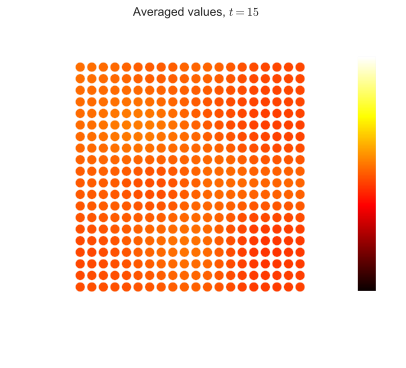

In [8]:
T = 10
update_values(g, T)
t = t + T

fig = plt.figure(figsize = (5, 5))
axFig = fig.add_axes([ 0.0, 0.0, 0.9, 0.9 ])
axFig.set_axis_off()
axFig.set_title("Averaged values, $t = {t}$".format(t = t))
draw_lattice_values(g)
axColourbar = fig.add_axes([ 0.9, 0.15, 0.05, 0.65 ])
axColourbar.set_axis_off()
colourBar = mpl.colorbar.ColorbarBase(axColourbar, cmap = cmap.hot,
                                      norm = mpl.colors.Normalize(vmin = 0, vmax = 100),
                                      orientation = 'vertical')
axColourbar.set_yticklabels([ 0, 100 ])
_ = plt.show()

### <span id="sec_concepts_processes_synchronisation_equilibrium"></span> Equilibrium

Clearly it's hard to decide when to stop this process: when has it "converged enough"? To put this slightly more scientifically, when does the process reach **equilibrium** such that the values aren't changing any more? Finding equilibrium is crucial, otherwise we're taking "results" from a process that's still changing.

One answer is to pick a time as being "long enough" and then extract a final result; another would be to define a set of criteria for what "close enough" means and run the process until this happens. In the interests of experimentation, let's try both and see what the differences are.

For the "long time" approach, we could observe that we're fairly well converged by $t = 15$ and and so could pick a time of $t = 100$ as long enough to finish the process. If we do this with a fresh network and show the distribution of values before and after, we get:

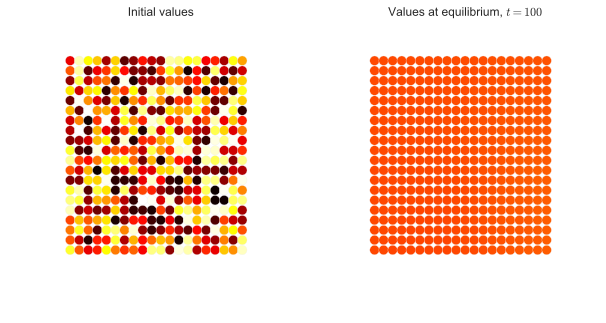

In [9]:
d = 20
T = 100
(g, vs) = init_lattice(d, d)

# set up the figure
fig = plt.figure(figsize = (10, 5))

# show the initial values
axFig = fig.add_subplot(121)
axFig.set_axis_off()
axFig.set_title("Initial values")
draw_lattice_values(g)

# run process to (presumed) equilibrium
for t in range(T):
    update_values_step(g)

# show the equilibrium values
axFig = fig.add_subplot(122)
axFig.set_axis_off()
axFig.set_title("Values at equilibrium, $t = {t}$".format(t = T))
draw_lattice_values(g)

_ = plt.show()

We can check how much variance there is, and how close to the "real" mean we've come through this process, by extracting all the nodes' values and examining them:

In [10]:
# extract all the values
evs = []
for n in g.nodes():
    evs.append(g.node[n][VALUE])

# report their properties
print "Real mean = {rm}, converged mean = {cm}, variance = {cv}".format(rm = numpy.mean(vs),
                                                                        cm = numpy.mean(evs),
                                                                        cv = numpy.var(evs))

Real mean = 48.3180844381, converged mean = 48.0627924047, variance = 0.913537217968


There's an obvious question as to how we decided that $t = 100$ was "long enough", and it turns out that this question, as well as being obvious, is also "interesting", in the sense that is answer is by no means clear and depends on the statistical properties of the global function being computed and on the topology of the network over which the computation occurs.

For the "close enough" approach, we might decide that we want a result that's only got less than 0.5% variance in values across the network. We could justify this by saying that we need a result of that precision in order to have enough confidence in the result: again, it's an interesting question how little variance is acceptable, whether the process converges monotonically to a final result, and so forth. We'll leave these questions to one side for now. To see how the process works, we'll run the convergence process and check and record its variance at each step, stopping when we get below the value we want, and then plot the results. Firstly we define a function that runs the process until termination:

In [11]:
def update_results_until_var( g, sigma ):
    '''Update the network until its variance drops below a desired threshold.
    
    :param g: the network
    :param sigma: the desired limit to the variance
    :returns: the variances'''
    vars = []
    while True:
        # extract the current values and compute the variance
        evs = []
        for n in g.nodes():
            evs.append(g.node[n][VALUE])
        var = numpy.var(evs)
        vars.append(var)
        
        if var < sigma:
            # bounce out it we're under the threshold
            return vars
        else:
            # step the process and repeat
            update_values_step(g)

We can now try this process against the same sort of lattice as above:

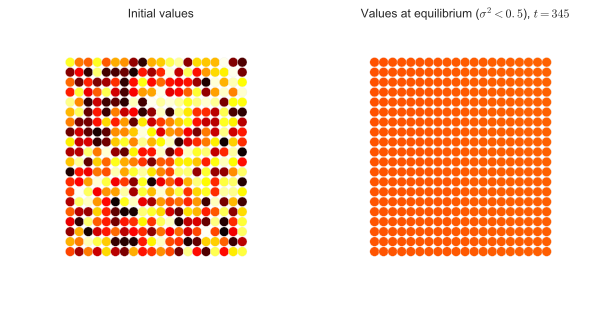

In [12]:
d = 20
dV = 0.5
(g, vs) = init_lattice(d, d)

# set up the figure
fig = plt.figure(figsize = (10, 5))

# show the initial values
axFig = fig.add_subplot(121)
axFig.set_axis_off()
axFig.set_title("Initial values")
draw_lattice_values(g)

# run process to equilibrium
vars = update_results_until_var(g, dV)
t = len(vars)

# show the equilibrium values
axFig = fig.add_subplot(122)
axFig.set_axis_off()
axFig.set_title("Values at equilibrium ($\sigma^2 < {dV}$), $t = {t}$".format(dV = dV, t = t))
draw_lattice_values(g)

_ = plt.show()

We can now also look at how the variance decreases as the process progresses:

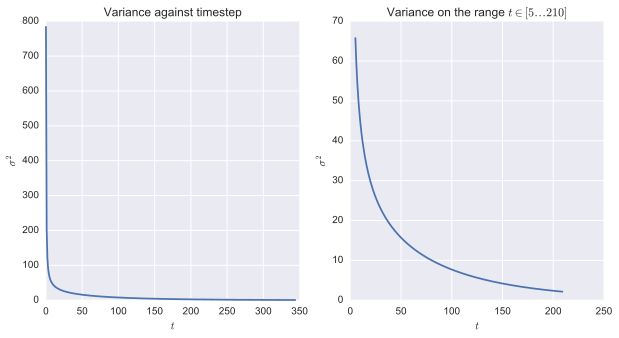

In [13]:
fig = plt.figure(figsize = (10, 5))

# show the changing variance
axVar = fig.add_subplot(121)
axVar.plot(xrange(len(vars)), vars)
axVar.set_xlabel("$t$")
axVar.set_ylabel("$\sigma^2$")
axVar.set_title("Variance against timestep")

# zoom-in on the core area of change
axDetail = fig.add_subplot(122)
l = 5
h = len([ v for v in vars if v < 5 ])   # 5% variance
axDetail.plot(xrange(l, h), vars[l:h])
axDetail.set_xlabel("$t$")
axDetail.set_ylabel("$\sigma^2$")
axDetail.set_title("Variance on the range $t \in [ {l} \ldots {h} ]$".format(l = l,
                                                                             h = h))

_ = plt.show()

In the left-hand sub-figure we have the variance deceasing exponentially. We've highlighted this in the right-hand sub-figure. Another way to think of this is that we get to a "small" variance very quickly, but it takes a considerable time to get to a "*really* small" variance.

### <span id="sec_concepts_processes_synchronisation_topology"></span> How topology affects convergence

We said earlier that the behaviour of a process was affected both by the mathematics of the local rules and by the topology of the network over which it runs. To finish off this chapter, we'll check this assertion by running the *same* process over two *different* network topologies to see whether there are any differences. Getting ahead of ourselves slightly, we'll compare the lattice against an [ER network](er-networks.ipynb). Interested readers can skip ahead to see what these networks entail: the important point, however, is that these topologies occur a lot in real-world processes and are radically different in terms of their degree distribution from the lattice.  

To do the comparison, we'll create sample networks in the two topologies, run the averaging process until we have a suitably low variance in node values, and plot the variance curves on the same axes: 

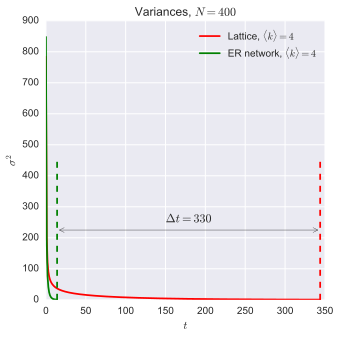

In [14]:
dV = 0.5
N = d * d

# values for the lattice
t_lt = len(vars)
k_lt = numpy.mean(g.degree().values())

# create the ER network
phi = (4 + 0.0) / N
g_er = (networkx.connected_component_subgraphs(networkx.erdos_renyi_graph(N, phi))).next()
_ = init_network(g_er)
k_er = numpy.mean(g_er.degree().values())

# set up the figure
fig = plt.figure(figsize = (5, 5))

# run processes to equilibrium
vars_er = update_results_until_var(g_er, dV)
t_er = len(vars_er)

# show the variances in the "interesting" range
l = 0
h_lt = len([ v for v in vars if v < 1 ])   # 1% variance
h_er = len([ v for v in vars_er if v < 1 ])
h = max(t_lt, t_er)

# plot variances
ax = plt.gca()
ax.plot(xrange(l, t_lt), vars[l:t_lt],    'r-', label = 'Lattice, $\langle k \\rangle = {k:.0f}$'.format(k = k_lt))
ax.plot(xrange(l, t_er), vars_er[l:t_er], 'g-', label = 'ER network, $\langle k \\rangle = {k:.0f}$'.format(k = k_er))

# add verticals and difference
ll = min([t_lt - 1, t_er - 1])
hl = ll + abs(t_lt  - t_er)
ml = ll + abs(t_lt  - t_er) / 2
yh = ax.get_ylim()
yl = (yh[1] - yh[0]) / 2
ax.plot([t_lt - 1, t_lt - 1], [0, yl], 'r--')
ax.plot([t_er - 1, t_er - 1], [0, yl], 'g--')
ax.annotate('',
            xy = (ll, yl / 2), xycoords = 'data', 
            xytext = (hl , yl / 2), textcoords = 'data',
            arrowprops = dict(ec = 'k', arrowstyle = '<->'))
ax.text(ml, yl / 1.8,
        '$\Delta t = {dt}$'.format(dt = abs(t_lt - t_er)),
        horizontalalignment = 'center')

# titling etc
ax.legend(loc = 'upper right')
ax.set_xlabel("$t$")
ax.set_ylabel("$\sigma^2$")
ax.set_title("Variances, $N = {N}$".format(N = N))

_ = plt.show()

So even for networks with the same mean degree, the differences in topology cause the same process to converge to the same variance at radically different rates. If this is the case for such a simple process, we can imagine that topology wilol play an enormous difference in more complex processes